In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('train_bike.csv')
print(bike_df.shape)
bike_df.head(10)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## datetime 연월구분

In [2]:
bike_df[['year','month','day']]=bike_df.datetime.str.split("-",expand=True)

bike_df = bike_df.astype({'year': int, 

                  'month': int})

bike_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,01 04:00:00
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,01 05:00:00
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,01 06:00:00
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,01 07:00:00
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,01 08:00:00
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,01 09:00:00


## season, weather 원핫인코딩

In [3]:
pd.get_dummies(bike_df['season'],prefix='season')

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10881,0,0,0,1
10882,0,0,0,1
10883,0,0,0,1
10884,0,0,0,1


In [4]:
pd.get_dummies(bike_df['weather'],prefix='weather')

,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10881,1,0,0,0
10882,1,0,0,0
10883,1,0,0,0
10884,1,0,0,0


In [5]:
bike_df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [6]:
bike_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [7]:
bike_df['year'].value_counts()
# data 값이 두개이므로 인코딩 시키면 좋을 것 같습니다.

2012    5464
2011    5422
Name: year, dtype: int64

## count 열 로그정규화

C:\Users\YEONWOO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

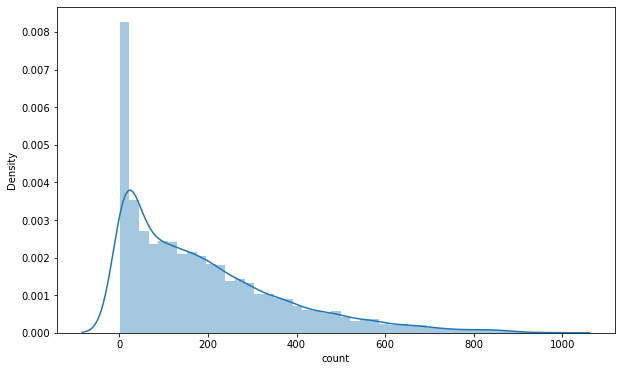

In [8]:
f, ax=plt.subplots(figsize=(10,6))
sns.distplot(bike_df["count"])

C:\Users\YEONWOO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_count', ylabel='Density'>

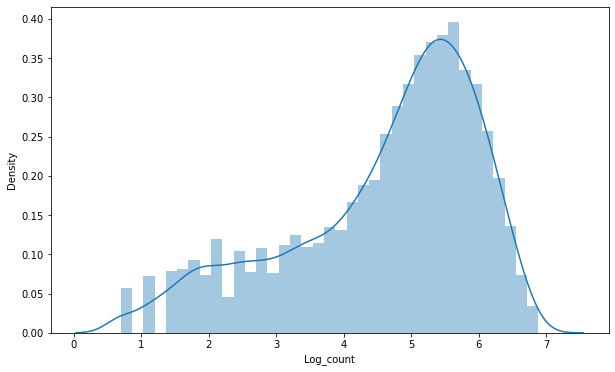

In [9]:
from sklearn.preprocessing import StandardScaler

bike_df["Log_count"]=np.log1p(bike_df["count"])

f,ax=plt.subplots(figsize=(10,6))
sns.distplot(bike_df["Log_count"])

In [10]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,Log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,01 00:00:00,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,01 01:00:00,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,01 02:00:00,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,01 03:00:00,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,01 04:00:00,0.693147


## Ridge

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


y_target_train_bike = bike_df['count']
X_data_train_bike = bike_df.drop(['count','day','datetime'],axis=1,inplace=False)

X_data_train_bike , X_test_bike , y_target_train_bike , y_test_bike = train_test_split(X_data_train_bike , y_target_train_bike ,
                                                                                   test_size=0.3, random_state=156)

ridge=Ridge(alpha=0.1).fit(X_data_train_bike, y_target_train_bike)
print("train set의 정확도 : {:.2f}".format(ridge.score(X_data_train_bike, y_target_train_bike)))

train set의 정확도 : 1.00


In [12]:
neg_mse_scores = cross_val_score(ridge, X_data_train_bike, y_target_train_bike, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

# Ridge RMSE 가 0이 나오는데 어느부분에서 문제가 있는지를 모르겠습니다...

 5 folds 의 개별 RMSE scores :  [0. 0. 0. 0. 0.]
 5 folds 의 평균 RMSE : 0.000 


In [13]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data_train_bike, y_target_train_bike, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 0.000 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.000 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.000 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.000 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.001 


## Lasso

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 10)
neg_mse_scores = cross_val_score(lasso, X_data_train_bike, y_target_train_bike, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 RMSE scores :  [0.221 0.19  0.199 0.207 0.222]
 5 folds 의 평균 RMSE : 0.208 


In [15]:
alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    
    neg_mse_scores = cross_val_score(lasso, X_data_train_bike, y_target_train_bike, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE : 0.002 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.003 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 0.011 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.022 
alpha 3 일 때 5 folds 의 평균 RMSE : 0.063 


In [16]:
coeff_df = pd.DataFrame()
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    lasso.fit (X_data_train_bike, y_target_train_bike)
    
    coeff = pd.Series(data=lasso.coef_, index=X_data_train_bike.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
registered,1.000004,1.000006,1.000016,1.000032,1.000090
casual,0.999959,0.999934,0.999763,0.999526,0.998616
season,0.000000,0.000000,0.000000,0.000000,0.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000
workingday,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
weather,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
temp,0.000000,0.000000,0.000000,0.000000,0.000000
atemp,0.000000,0.000000,0.000000,0.000000,0.000000
humidity,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
windspeed,0.000000,0.000000,0.000000,0.000000,0.000000


## Elastic Net

In [17]:
bike_df_test = pd.read_csv('test_bike.csv')
print(bike_df_test.shape)
bike_df_test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [18]:
bike_df_test[['year','month','day']]=bike_df_test.datetime.str.split("-",expand=True)
bike_df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20 00:00:00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20 01:00:00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20 02:00:00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20 03:00:00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20 04:00:00


In [19]:
X_data_test_bike = bike_df_test.drop(['day','datetime'],axis=1,inplace=False)

In [20]:
from sklearn.linear_model import ElasticNet

alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas :
    elsnet = ElasticNet(alpha = alpha, l1_ratio=0.7)
    
    neg_mse_scores = cross_val_score(elsnet, X_data_train_bike, y_target_train_bike, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE : 0.002 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.002 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 0.011 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.021 
alpha 3 일 때 5 folds 의 평균 RMSE : 0.063 


In [21]:
coeff_df = pd.DataFrame()
for alpha in alphas :
    elsnet = ElasticNet(alpha = alpha, l1_ratio=0.7)
    elsnet.fit(X_data_train_bike, y_target_train_bike)
    
    coeff = pd.Series(data=elsnet.coef_, index=X_data_train_bike.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
registered,1.000002,1.000003,1.000017,1.000032,1.000091
casual,0.999967,0.999952,0.999754,0.999527,0.998608
season,0.000000,0.000000,0.000000,0.000000,0.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000
workingday,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
weather,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
temp,0.000000,0.000000,0.000000,0.000000,0.000000
atemp,0.000000,0.000000,0.000000,0.000000,0.000000
humidity,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
windspeed,0.000000,0.000000,0.000000,0.000000,0.000000


## 로지스틱 회귀

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
 
lr_clf = LogisticRegression()
lr_clf.fit(X_data_train_bike, y_target_train_bike)
lr_preds = lr_clf.predict(X_test_bike)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test_bike, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test_bike , lr_preds),multi_class="ovo",average=None))

##ovo/ovr 지정을 해도 에러가 뜨는 문제가 발생했습니다...

C:\Users\YEONWOO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.041


ValueError: multi_class must be in ('ovo', 'ovr')

## 트리기반 회귀

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [24]:
from sklearn.metrics import mean_squared_error

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    model.fit(X_data_train_bike, y_target_train_bike)
    y_pred = model.predict(X_test_bike)
    mse = mean_squared_error(y_pred, y_test_bike)
    rmse = mse**(1/2)
    
    print(model.__class__.__name__,'회귀 모델의 rmse 값:', rmse)

DecisionTreeRegressor 회귀 모델의 rmse 값: 13.415474239352937
RandomForestRegressor 회귀 모델의 rmse 값: 0.5143340958516573
GradientBoostingRegressor 회귀 모델의 rmse 값: 0.6876390551827973
XGBRegressor 회귀 모델의 rmse 값: 0.7805291165780847
LGBMRegressor 회귀 모델의 rmse 값: 1.964139957837573


In [25]:
rf = RandomForestRegressor()
neg_mse_scores = cross_val_score(rf, X_test_bike, y_test_bike, scoring="neg_mean_squared_error", cv =5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("negative mse scores : ", np.round(neg_mse_scores, 2))
print("rmse scores : ",np.round(rmse_scores, 2))
print("avg socres : ", np.round(avg_rmse))

negative mse scores :  [ -0.83  -0.34  -0.71  -1.58 -16.79]
rmse scores :  [0.91 0.58 0.84 1.26 4.1 ]
avg socres :  2.0
